<a href="https://colab.research.google.com/github/melihkurtaran/DNA_hackathon/blob/template_matching/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba.zip -d /content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!pip install gif2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for gif2numpy: filename=gif2numpy-1.3-py2.py3-none-any.whl size=8392 sha256=0f59516d8a03b6290afaf3c99d163252e3ab1b939d345522549383865ae4c448
  Stored in directory: /root/.cache/pip/wheels/7d/70/75/7e42205c427015e223944d47ea89e01dc779fb49ba664fb743
Successfully built gif2numpy


In [3]:
import gif2numpy
import cv2
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image,ImageDraw
import os
%matplotlib inline
import numpy as np

In [ ]:
data_path = '/content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/'
def get_sensor_mask(img):
  # color pallete in bgr
  sensor_color_list = [[0, 255, 255],[0, 192, 0],[0, 255, 0],[0, 127, 255],[90, 0, 200],[252, 0, 0],[252, 148, 0],[252, 252, 0],[35, 131, 67],[0, 187, 255],[0, 0, 255]]
  mask_img = np.empty(img.shape)
  for row_i in range(img.shape[0]):
    for pixel_i in range(img.shape[1]):
      if list(img[row_i, pixel_i]) not in sensor_color_list:
        mask_img[row_i, pixel_i] = [0,0,0]
      else:
        mask_img[row_i, pixel_i] = img[row_i, pixel_i]
  mask_img = mask_img[:480,:,:]
  mask_img = np.uint8(mask_img)
  mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY) 
  mask_img = mask_img/mask_img.max()
  return mask_img

np_frames, extensions, image_specifications = gif2numpy.convert(data_path+'va/20220219/aemet_va_202202192320.gif')
im2 = get_sensor_mask(np.array(np_frames[0]))
print(im2.shape, im2.max(), im2.min())

(480, 480) 1.0 0.0


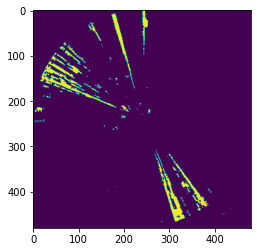

In [ ]:
imshow(im2>0.01)

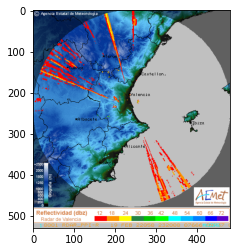

In [ ]:
imshow(np_frames[0])

In [ ]:
to_save = '/content/drive/MyDrive/EDISS_winter_school/segmentation_data/input'
outsave = '/content/drive/MyDrive/EDISS_winter_school/segmentation_data/output'

In [ ]:
to_save = '/content/drive/MyDrive/EDISS_winter_school/segmentation_data/inp_val/img'
outsave = '/content/drive/MyDrive/EDISS_winter_school/segmentation_data/out_val/img'

In [ ]:
data_path = '/content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/'
data = {}
num =0
for state in sorted(os.listdir(data_path)):
  if state[0] =='.' or state[0]=='_':
    continue
  data[state] = {}
  for i in sorted(os.listdir(os.path.join(data_path,state))):
    if i[0] =='.' or i[0]=='_':
      continue
    a = i[4:6]
    if i[4:6] not in data[state]:
      data[state][a] = []
    for im in sorted(os.listdir(os.path.join(data_path,state, i))):
      num+=1
      if i[0] =='.' or i[0]=='_':
        continue
      if a == '01' and num>212 and num<230:
        np_frames, _ , _ = gif2numpy.convert(os.path.join(data_path,state,i,im))
        image = np.array(np_frames[0])
        print('path ', os.path.join(to_save,im[:-3]+'jpg'))  
        print(cv2.imwrite(os.path.join(to_save,im[:-3]+'jpg'),image))

        im2 = get_sensor_mask(np.array(np_frames[0]))
        print(cv2.imwrite(os.path.join(outsave,im[:-3]+'png'),im2*255))
      data[state][a].append(os.path.join(data_path,state,i,im))

path  /content/drive/MyDrive/EDISS_winter_school/segmentation_data/inp_val/img/aemet_ba_202201021120.jpg
True
True
path  /content/drive/MyDrive/EDISS_winter_school/segmentation_data/inp_val/img/aemet_ba_202201021130.jpg
True
True
path  /content/drive/MyDrive/EDISS_winter_school/segmentation_data/inp_val/img/aemet_ba_202201021140.jpg
True
True
path  /content/drive/MyDrive/EDISS_winter_school/segmentation_data/inp_val/img/aemet_ba_202201021150.jpg
True
True
path  /content/drive/MyDrive/EDISS_winter_school/segmentation_data/inp_val/img/aemet_ba_202201021200.jpg
True
True
path  /content/drive/MyDrive/EDISS_winter_school/segmentation_data/inp_val/img/aemet_ba_202201021210.jpg
True
True
path  /content/drive/MyDrive/EDISS_winter_school/segmentation_data/inp_val/img/aemet_ba_202201021220.jpg
True
True
path  /content/drive/MyDrive/EDISS_winter_school/segmentation_data/inp_val/img/aemet_ba_202201021230.jpg
True
True
path  /content/drive/MyDrive/EDISS_winter_school/segmentation_data/inp_val/img/a

In [ ]:
len(os.listdir(outsave))

212

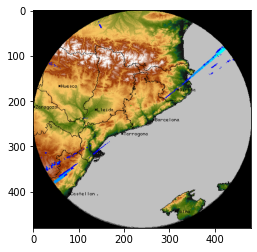

In [ ]:

np_frames, extensions, image_specifications = gif2numpy.convert("/content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/20220101/aemet_ba_202201010000.gif")
the_frame = np.array(np_frames[0])
h=the_frame.shape[0]
w=the_frame.shape[1]

the_frame =  the_frame[:w,:,:]
the_frame = cv2.cvtColor(the_frame, cv2.COLOR_BGR2RGB)
the_frame_pil = Image.fromarray(the_frame)
alpha = Image.new('L', (the_frame.shape[0],the_frame.shape[1]),0)
draw = ImageDraw.Draw(alpha)
draw.pieslice([0,0,w,w],0,360, fill=255)
npAlpha=np.array(alpha)
npAlpha=np.stack([npAlpha,npAlpha,npAlpha],axis=2)
the_frame = (the_frame/255) * (npAlpha/255)
the_frame = np.uint8(the_frame*255)


imshow(the_frame)

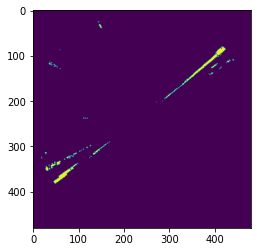

In [ ]:
hsv = cv2.cvtColor(the_frame, cv2.COLOR_RGB2HSV)
lower_blue = np.array([87,0,0])
upper_blue = np.array([136,255,255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
imshow(mask)
  

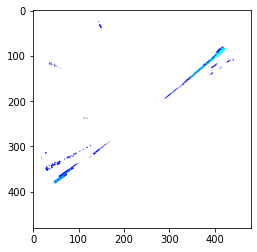

In [ ]:
mask = np.stack([mask,mask,mask],axis=2)
result = cv2.bitwise_and(the_frame, mask)
result[mask==0] = 255
imshow(result)
mask = result

In [ ]:
mask.shape

(480, 480, 3)

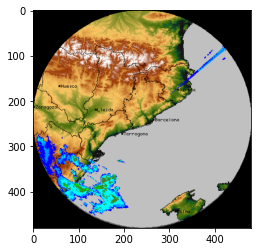

In [ ]:
cloud_frame = '/content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/20220419/aemet_ba_202204190000.gif'
np_frames, extensions, image_specifications = gif2numpy.convert(cloud_frame)
cloud_frame = np.array(np_frames[0])
h=cloud_frame.shape[0]
w=cloud_frame.shape[1]

cloud_frame =  cloud_frame[:w,:,:]
cloud_frame = cv2.cvtColor(cloud_frame, cv2.COLOR_BGR2RGB)
the_frame_pil = Image.fromarray(cloud_frame)
alpha = Image.new('L', (cloud_frame.shape[0],cloud_frame.shape[1]),0)
draw = ImageDraw.Draw(alpha)
draw.pieslice([0,0,w,w],0,360, fill=255)
npAlpha=np.array(alpha)
npAlpha=np.stack([npAlpha,npAlpha,npAlpha],axis=2)
cloud_frame = (cloud_frame/255) * (npAlpha/255)
cloud_frame = np.uint8(cloud_frame*255)


imshow(cloud_frame)

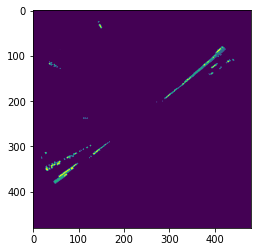

In [ ]:
imshow(1-template)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img2 = cloud_frame.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
template = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [ ]:
from scipy import signal
cor = signal.correlate2d(template, img2)
cor

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
cor.sum()

110309208

In [ ]:
img3 = cv2.cvtColor(the_frame, cv2.COLOR_RGB2GRAY)
cor1 = signal.correlate2d(template, img3)

In [ ]:
cor1.sum()

110025422

In [ ]:
cor.sum()-cor1.sum()

283786

#Semantic Segmentation



In [4]:
import keras
import tensorflow as tf
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [45]:
def image_preprocessing(inp):
  inp = inp[:480,:]
  # inp = cv2.cvtColor(inp, cv2.COLOR_BGR2GRAY)
  inp=np.expand_dims(inp,axis=2)
  return inp

def mask_preprocessing(inp):
  return inp

In [ ]:
p = '/content/drive/MyDrive/EDISS_winter_school/segmentation_data/inputs/img'
for i in os.listdir(p):
  img = cv2.imread(os.path.join(p,i),0)
  print(img.shape)
  img = image_preprocessing(img)
  print(cv2.imwrite(os.path.join(p,i),img))



In [75]:
seed = 909 # (IMPORTANT) to transform image and corresponding mask with same augmentation parameter.
image_datagen = ImageDataGenerator()
                #  preprocessing_function = image_preprocessing) # custom fuction for each image you can use resnet one too.
mask_datagen = ImageDataGenerator()
                #  preprocessing_function = mask_preprocessing)  # to make mask as feedable formate (256,256,1)
image_generator =image_datagen.flow_from_directory("/content/drive/MyDrive/EDISS_winter_school/segmentation_data/inputs/",
                                                    seed=seed,batch_size=4,class_mode=None, target_size=(480, 480))
mask_generator = mask_datagen.flow_from_directory("/content/drive/MyDrive/EDISS_winter_school/segmentation_data/outputs",
                                                  seed=seed,batch_size=4,target_size=(480, 480),class_mode=None,)

train_generator = zip(image_generator, mask_generator)

image_datagen = ImageDataGenerator()
                #  preprocessing_function = image_preprocessing) # custom fuction for each image you can use resnet one too.
mask_datagen = ImageDataGenerator()
                #  preprocessing_function = mask_preprocessing)  # to make mask as feedable formate (256,256,1)
image_generator =image_datagen.flow_from_directory("/content/drive/MyDrive/EDISS_winter_school/segmentation_data/inp_val",
                                                    seed=seed,batch_size=1,class_mode=None,target_size=(480, 480))
mask_generator = mask_datagen.flow_from_directory("/content/drive/MyDrive/EDISS_winter_school/segmentation_data/out_val",
                                                  seed=seed,batch_size=1,target_size=(480, 480),class_mode=None,)

val_generator = zip(image_generator, mask_generator)

Found 212 images belonging to 1 classes.
Found 212 images belonging to 1 classes.
Found 17 images belonging to 1 classes.
Found 17 images belonging to 1 classes.


In [90]:

inputs = tf.keras.layers.Input((480, 480, 3))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.Dropout(0.2)(c1)
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
c1 = tf.keras.layers.BatchNormalization()(c1)
p1 = tf.keras.layers.Conv2D(32, (2, 2), strides=2, padding="same")(c1)#downsampling

c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.Dropout(0.2)(c2)
c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
c2 = tf.keras.layers.BatchNormalization()(c2)
p2 = tf.keras.layers.Conv2D(64, (2, 2), strides=2, padding="same")(c2)#downsamplibg


c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.Dropout(0.3)(c3)
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
c3 = tf.keras.layers.BatchNormalization()(c3)

#Expansive path 
u4 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c3)
u4 = tf.keras.layers.concatenate([u4, c2])
c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u4)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
c4 = tf.keras.layers.BatchNormalization()(c4)


u5 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c4)
u5 = tf.keras.layers.concatenate([u5, c1])
c5 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.Dropout(0.2)(c5)
c5 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)

outputs = tf.keras.layers.Conv2D(3, (1, 1), activation='softmax')(c5)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_16 (Lambda)             (None, 480, 480, 3)  0           ['input_17[0][0]']               
                                                                                                  
 conv2d_208 (Conv2D)            (None, 480, 480, 32  896         ['lambda_16[0][0]']              
                                )                                                                 
                                                                                           

In [91]:
print(sorted(os.listdir('/content/drive/MyDrive/EDISS_winter_school/segmentation_data/inp_val/img')))
print(sorted(os.listdir('/content/drive/MyDrive/EDISS_winter_school/segmentation_data/out_val/img')))


['aemet_ba_202201021120.jpg', 'aemet_ba_202201021130.jpg', 'aemet_ba_202201021140.jpg', 'aemet_ba_202201021150.jpg', 'aemet_ba_202201021200.jpg', 'aemet_ba_202201021210.jpg', 'aemet_ba_202201021220.jpg', 'aemet_ba_202201021230.jpg', 'aemet_ba_202201021240.jpg', 'aemet_ba_202201021250.jpg', 'aemet_ba_202201021300.jpg', 'aemet_ba_202201021310.jpg', 'aemet_ba_202201021320.jpg', 'aemet_ba_202201021330.jpg', 'aemet_ba_202201021340.jpg', 'aemet_ba_202201021350.jpg', 'aemet_ba_202201021400.jpg']
['aemet_ba_202201021120.png', 'aemet_ba_202201021130.png', 'aemet_ba_202201021140.png', 'aemet_ba_202201021150.png', 'aemet_ba_202201021200.png', 'aemet_ba_202201021210.png', 'aemet_ba_202201021220.png', 'aemet_ba_202201021230.png', 'aemet_ba_202201021240.png', 'aemet_ba_202201021250.png', 'aemet_ba_202201021300.png', 'aemet_ba_202201021310.png', 'aemet_ba_202201021320.png', 'aemet_ba_202201021330.png', 'aemet_ba_202201021340.png', 'aemet_ba_202201021350.png', 'aemet_ba_202201021400.png']


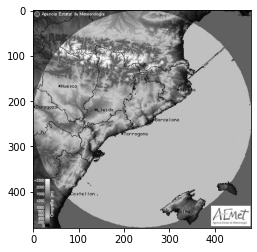

In [92]:
imshow(np.uint8(x_batch[0,:,:,:]))

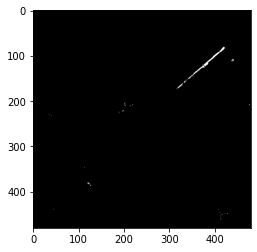

In [93]:
imshow(y_batch[0,:,:,:])

In [94]:
model.fit_generator(train_generator,
 validation_data = val_generator,
  steps_per_epoch = 212//4,validation_steps=17,
 epochs = 10)


Epoch 1/10


<ipython-input-94-35d20c171c84>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


53/53 [==============================] - 16s 266ms/step - loss: 7.4260 - accuracy: 0.3518 - val_loss: 7.0819 - val_accuracy: 0.0577
Epoch 2/10
53/53 [==============================] - 14s 265ms/step - loss: 11.7483 - accuracy: 0.2712 - val_loss: 2.8422 - val_accuracy: 0.0646
Epoch 3/10
53/53 [==============================] - 14s 271ms/step - loss: 10.9620 - accuracy: 0.3377 - val_loss: 22.8809 - val_accuracy: 0.0283
Epoch 4/10
53/53 [==============================] - 14s 273ms/step - loss: 10.4641 - accuracy: 0.3937 - val_loss: 12.5039 - val_accuracy: 0.0110
Epoch 5/10
53/53 [==============================] - 15s 276ms/step - loss: 10.7648 - accuracy: 0.4232 - val_loss: 12.4581 - val_accuracy: 0.0040
Epoch 6/10
53/53 [==============================] - 15s 285ms/step - loss: 10.5619 - accuracy: 0.4271 - val_loss: 10.2327 - val_accuracy: 0.0154
Epoch 7/10
39/53 [=====================>........] - ETA: 3s - loss: 11.0202 - accuracy: 0.4208

KeyboardInterrupt: ignored

In [ ]:
model.save('segmentor.h5')

In [ ]:
cloud_frame = '/content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/20220503/aemet_ba_202205030250.gif'
# cloud_frame ='/content/drive/MyDrive/EDISS_winter_school/data/aemet/10min/ba/20220404/aemet_ba_202204040000.gif'
np_frames, extensions, image_specifications = gif2numpy.convert(cloud_frame)
img = np.uint8(np_frames[0])
img = cv2.resize(img,(480,480))
img = np.expand_dims(img,axis=0)
# img = np.stack([img,img,img], axis=2)
print(img.shape, img.max())

pred = model.predict(img)

In [ ]:
predic = np.squeeze(pred)
imshow(predic*255)